In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpmath as mp
from time import time
from metropolis import run_metropolis
from count_solutions import count_solutions, estimate_zetab

### Time/Iterations to find one solution

In [23]:
N_arr = [4, 10, 26, 50, 100, 200, 500, 1000, 2000, 5000]
t_arr = []
iters_arr = []
n_repetitions = 5
max_moves = 1_000_000
beta = 20

np.random.seed(42)
for N in N_arr:
    t_arr_arr = []
    iters_arr_arr = []
    for _ in range(n_repetitions):
        t = time()
        iters, queens, _ = run_metropolis(
            N,
            max_moves,
            beta,
            mode="solve",
            beta_strategy="fixed",
            debug=False
        )
        t_arr_arr.append(time() - t)
        iters_arr_arr.append(iters)
    t_arr.append((t_arr_arr))
    iters_arr.append((iters_arr_arr))
    print(f"Solution found in {iters} moves, {time() - t:e} seconds.")

Solution found in 722462 moves, 5.717779e+02 seconds.


In [27]:
t_df = pd.DataFrame(t_arr, index=N_arr, columns=range(n_repetitions)).T
t_df = t_df.melt(var_name="N", value_name="time")
iters_df = pd.DataFrame(iters_arr, index=N_arr, columns=range(n_repetitions)).T
iters_df = iters_df.melt(var_name="N", value_name="iters")

In [28]:
# Save dataframes
t_df.to_csv("data/times.csv", index=False)
iters_df.to_csv("data/iters.csv", index=False)

In [60]:
# Load dataframes
N_arr = [4, 10, 26, 50, 100, 200, 500, 1000, 2000, 5000]
t_df = pd.read_csv("data/times.csv")
iters_df = pd.read_csv("data/iters.csv")

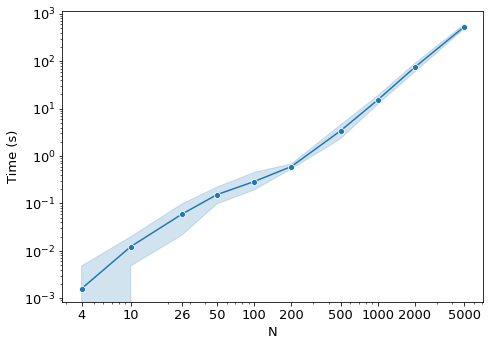

In [61]:
plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="time", data=t_df, marker="o")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Time (s)")
plt.xticks(N_arr, N_arr)
plt.tight_layout()
plt.savefig("figures/times.pdf", bbox_inches='tight')
plt.show()

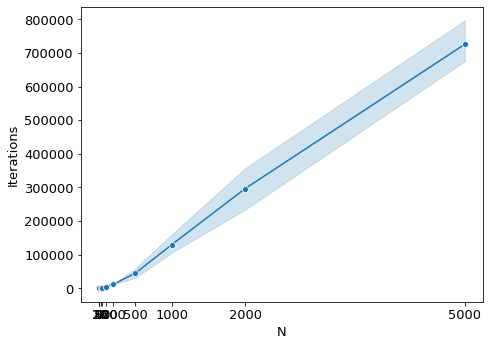

In [62]:
plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="iters", data=iters_df, marker="o")

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.xticks(N_arr, N_arr)
plt.tight_layout()
plt.savefig("figures/iters.pdf", bbox_inches='tight')
plt.show()

### Number of solutions

In [2]:
N_arr = [4, 8, 20, 21, 22, 23, 24, 25, 26, 50, 100, 200, 500, 1000]
beta_grid_small = [0, 0.01, 1, 3, 5, 10]
beta_grid_large = [
        0,
        0.01,
        0.1,
        0.25,
        0.375,
        0.5,
        0.625,
        0.75,
        1,
        1.25,
        1.5,
        1.75,
        2,
        2.5,
        3,
        4,
        5,
        10,
        20,
    ]
convergence_moves = 200_000
counting_moves = 300_000
n_repetitions = 5
Z_arr = []


for N in N_arr:
    if N < 20:
        beta_grid = beta_grid_small
    else:
        beta_grid = beta_grid_large

    Z_arr_arr = []
    for i in range(1, n_repetitions+1):
        Z = count_solutions(N, convergence_moves, counting_moves, beta_grid, debug=False, iter=i)
        Z_arr_arr.append(Z)
        with mp.workdps(4):
            print(f"N = {N}, i = {i}, Z = {Z}")
    
    Z_arr.append(Z_arr_arr)

N = 4, i = 1, Z = 2.017
N = 4, i = 2, Z = 2.012
N = 4, i = 3, Z = 1.995
N = 4, i = 4, Z = 2.003
N = 4, i = 5, Z = 1.991
N = 8, i = 1, Z = 89.74
N = 8, i = 2, Z = 91.16
N = 8, i = 3, Z = 91.46
N = 8, i = 4, Z = 88.17
N = 8, i = 5, Z = 93.55
N = 20, i = 1, Z = 4.267e+10
N = 20, i = 2, Z = 3.874e+10
N = 20, i = 3, Z = 3.733e+10
N = 20, i = 4, Z = 3.505e+10
N = 20, i = 5, Z = 3.925e+10
N = 21, i = 1, Z = 3.407e+11
N = 21, i = 2, Z = 3.209e+11
N = 21, i = 3, Z = 3.287e+11
N = 21, i = 4, Z = 3.255e+11
N = 21, i = 5, Z = 3.244e+11
N = 22, i = 1, Z = 2.816e+12
N = 22, i = 2, Z = 2.837e+12
N = 22, i = 3, Z = 2.588e+12
N = 22, i = 4, Z = 2.832e+12
N = 22, i = 5, Z = 2.593e+12
N = 23, i = 1, Z = 2.688e+13
N = 23, i = 2, Z = 2.365e+13
N = 23, i = 3, Z = 2.466e+13
N = 23, i = 4, Z = 2.625e+13
N = 23, i = 5, Z = 2.361e+13
N = 24, i = 1, Z = 2.075e+14
N = 24, i = 2, Z = 2.236e+14
N = 24, i = 3, Z = 2.193e+14
N = 24, i = 4, Z = 2.237e+14
N = 24, i = 5, Z = 2.456e+14
N = 25, i = 1, Z = 2.329e+15
N = 25

In [3]:
Z_df = pd.DataFrame(Z_arr, index=N_arr, columns=range(n_repetitions))
temp = Z_df.apply(lambda x: np.array(x, dtype=object), axis=1)
Z_stats = pd.DataFrame()
Z_stats.index = Z_df.index
Z_stats["mean"] = temp.apply(lambda x: mp.nstr(np.mean(x), 4))
Z_stats["std"] = temp.apply(lambda x: mp.nstr(np.std(x), 4))
Z_stats["std_err"] = temp.apply(lambda x: mp.nstr(np.std(x) / np.sqrt(len(x)), 4))
Z_stats

,mean,std,std_err
4,2.004,0.009926,0.004439
8,90.82,1.797,0.8036
20,3.861e+10,2.498e+9,1.117e+9
21,3.28e+11,6.789e+9,3.036e+9
22,2.733e+12,1.164e+11,5.206e+10
23,2.501e+13,1.337e+12,5.981e+11
24,2.24e+14,1.233e+13,5.513e+12
25,2.247e+15,1.806e+14,8.079e+13
26,2.159e+16,1.76e+15,7.872e+14
50,2.536e+44,2.912e+43,1.302e+43


In [73]:
Z_df_plot = pd.concat([Z_df.iloc[1:3, :], Z_df.iloc[8:, :]])
Z_df_plot = Z_df_plot.T.melt(var_name="N", value_name="Z")
Z_df_plot.Z = Z_df_plot.Z.apply(lambda x: float(mp.log(x)))

C:\Users\franc\AppData\Local\Temp\ipykernel_3200\926702365.py:11: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x0000025365E8F6D0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["Metropolis estimate", "_", r"$N!/e^N$"])


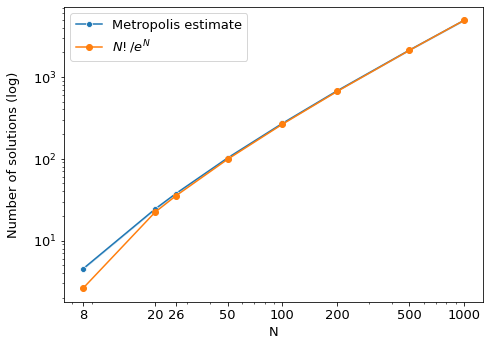

In [83]:
N_arr_plot = N_arr[1:3] + N_arr[8:]
Z_ref_arr = list(map(lambda N: mp.log(mp.factorial(N) / mp.exp(N)), N_arr_plot))


plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="Z", data=Z_df_plot, marker="o", ci=95)
plt.plot(N_arr_plot, Z_ref_arr, "o-")
plt.xscale("log")
plt.yscale("log")
plt.legend(["Metropolis estimate", "_", r"$N!/e^N$"])
plt.xlabel("N")
plt.ylabel("Number of solutions (log)", labelpad=13)
plt.xticks(N_arr_plot, N_arr_plot)
plt.tight_layout()
plt.savefig("figures/solutions.pdf", bbox_inches='tight')
plt.show()

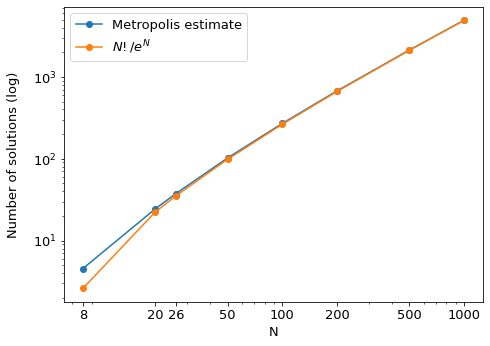

In [65]:
N_arr_plot = N_arr[1:3] + N_arr[8:]
Z_arr_plot = Z_arr[1:3] + Z_arr[8:]
Z_ref_arr = list(map(lambda N: mp.log(mp.factorial(N) / mp.exp(N)), N_arr_plot))

plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
plt.plot(N_arr_plot, Z_arr_plot, "o-")
plt.plot(N_arr_plot, Z_ref_arr, "o-")
plt.xscale("log")
plt.yscale("log")

plt.legend(["Metropolis estimate", r"$N!/e^N$"])
plt.xlabel("N")
plt.ylabel("Number of solutions (log)", labelpad=13)
plt.xticks(N_arr_plot, N_arr_plot)
plt.tight_layout()
plt.savefig("figures/solutions.pdf", bbox_inches='tight')
plt.show()

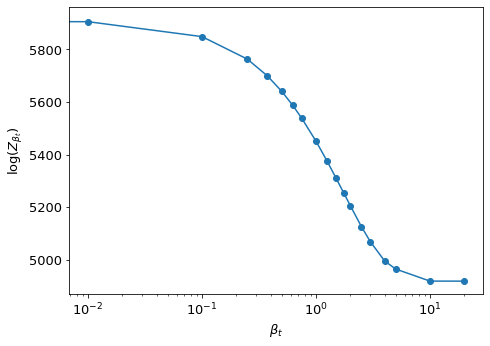

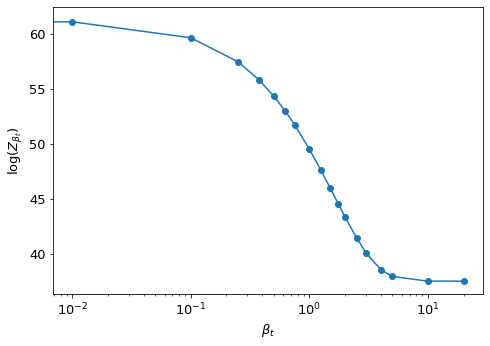

In [66]:
# Plot log(Z_beta) vs beta
for N in [1000, 26]:
    Z_arr = estimate_zetab(N, convergence_moves, counting_moves, beta_grid, debug=False)
    Z_arr = list(map(lambda Z: mp.log(Z), Z_arr))

    plt.rcParams.update({"font.size": 13})
    plt.figure(figsize=(7, 5))
    plt.plot(beta_grid, Z_arr, "o-")
    plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel(r"$\beta_t$")
    plt.ylabel(r"$\log(Z_{\beta_t})$")
    plt.tight_layout()
    plt.savefig(f"figures/zetab_{N}.pdf", bbox_inches='tight')
    plt.show()